In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('cleaned_data_4.csv')

In [51]:
df.head(10)

,Brand,Price,Processor_Brand,RAM_Expandable,RAM_Capacity,RAM_TYPE(DDR),Display_type,GPU_Brand,Processor_Category,Processor_Speed(Ghz),Display_Tier,GPU_Tier,SSD(GB),HDD(GB)
0,5,127011.5,0,1,8,3,0,0,4,4.0,1,1,512,0
1,3,274750.0,2,1,16,5,0,3,10,3.5,1,3,512,0
2,4,194215.0,2,1,8,3,0,2,10,4.0,1,2,512,0
3,7,76965.0,2,0,8,4,0,2,9,1.5,1,1,512,0
4,1,122465.0,2,1,16,3,0,2,10,2.5,1,2,512,0
5,4,173596.5,0,1,8,3,0,0,4,4.0,1,1,512,0
6,1,139965.0,2,1,8,3,0,2,10,2.5,1,2,512,0
7,5,115888.5,2,1,4,3,1,2,9,2.0,1,1,0,1024
8,0,171465.0,2,0,8,3,0,3,10,3.0,1,3,512,0
9,5,325465.0,0,1,16,5,0,3,5,3.5,1,3,512,0


### Feature-Target Split

In [52]:
# Target variable
y = df["Price"]

# drop target column
X = df.drop(columns=["Price"])

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Here I verify all features are numeric
print("\nFeature types:\n", X.dtypes.value_counts())

Features shape: (3725, 13)
Target shape: (3725,)

Feature types:
 int64      12
float64     1
Name: count, dtype: int64


### Train-Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 2980 samples
Test set: 745 samples


### Base Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 2980, number of used features: 13
[LightGBM] [Info] Start training from score 248443.754530
Baseline LightGBM Performance:
RMSE: 69510.33
MAE: 43934.80
R² Score: 0.8065


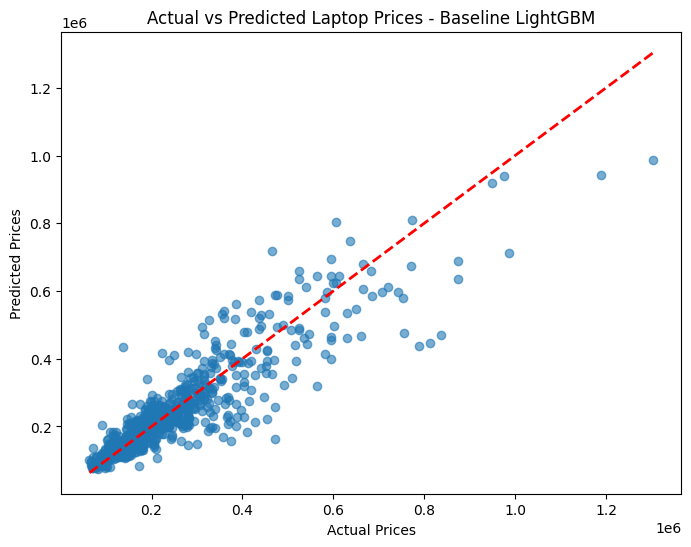

In [54]:
# Initialize baseline LGBMRegressor with default parameters
baseline_model = lgb.LGBMRegressor(random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = baseline_model.predict(X_test)


# Evaluate Baseline Performance

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
mae = mean_absolute_error(y_test, y_pred)           # MAE
r2 = r2_score(y_test, y_pred)                       # R² score

print("Baseline LightGBM Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices - Baseline LightGBM")
plt.show()

### Hyper parameter tuning 

In [55]:
# from sklearn.model_selection import RandomizedSearchCV

# # new model initialization
# tuning_model = lgb.LGBMRegressor(
#     objective='regression',
#     random_state=42,
#     n_estimators=1000 
# )

# # parameter grid
# param_dist = {
#     'num_leaves': [20, 31, 40, 50, 70, 90, 110, 150],
#     'max_depth': [-1, 5, 10, 15, 20, 25, 30, 40],
#     'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.07, 0.1, 0.15],
#     'min_child_samples': [5, 10, 15, 20, 30, 40, 50, 60, 80, 100],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'lambda_l1': [0, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 2.0],
#     'lambda_l2': [0, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 2.0],
#     'min_split_gain': [0.0, 0.01, 0.05, 0.1, 0.3, 0.5]
# }


# # randomized search
# random_search = RandomizedSearchCV(
#     estimator=tuning_model,
#     param_distributions=param_dist,
#     n_iter=100, # 50 random combinations are considered
#     scoring='neg_root_mean_squared_error',
#     cv=5,       
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the search on the training data
# random_search.fit(X_train, y_train)

In [56]:
# print("\nBest Parameters found by RandomizedSearchCV:")
# print(random_search.best_params_)
# print(f"Best CV RMSE: {-random_search.best_score_:.2f}")

In [57]:
from lightgbm import early_stopping, log_evaluation

# get best params from tuning
# best_params = random_search.best_params_

# define final model
final_model = lgb.LGBMRegressor(
    # **best_params,
    subsample=0.6,
    num_leaves=20,
    min_split_gain=0.05,
    min_child_samples=5,
    max_depth=25,
    learning_rate=0.01,
    lambda_l2=0.5,
    lambda_l1=1.0,
    colsample_bytree=0.5,
    n_estimators=5000,  # large number so early stopping can work
    objective='regression',
    random_state=42
)

# fit with new-style callbacks
final_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=0)  # suppress per-iteration logs
    ]
)

print(f"Best iteration (trees actually used): {final_model.best_iteration_}")


[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 2980, number of used features: 13
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Start train

In [58]:
y_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration_)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nOptimized LightGBM Performance on Test Data:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0

Optimized LightGBM Performance on Test Data:
RMSE: 67975.21
MAE: 43416.61
R² Score: 0.8149


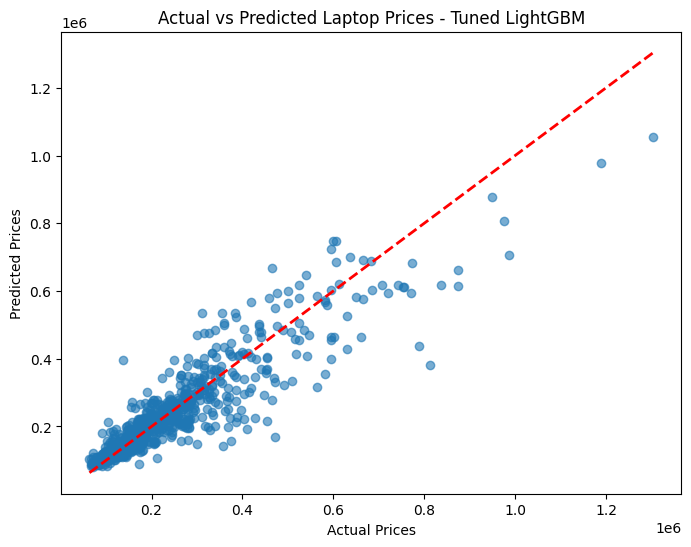

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices - Tuned LightGBM")
plt.show()

Top 20 Important Features:
                 Feature  Importance
0                  Brand         524
8   Processor_Speed(Ghz)         441
7     Processor_Category         435
4          RAM_TYPE(DDR)         335
10              GPU_Tier         251
11               SSD(GB)         222
3           RAM_Capacity         193
2         RAM_Expandable         152
5           Display_type         130
6              GPU_Brand         117
9           Display_Tier         106
1        Processor_Brand          68
12               HDD(GB)          26


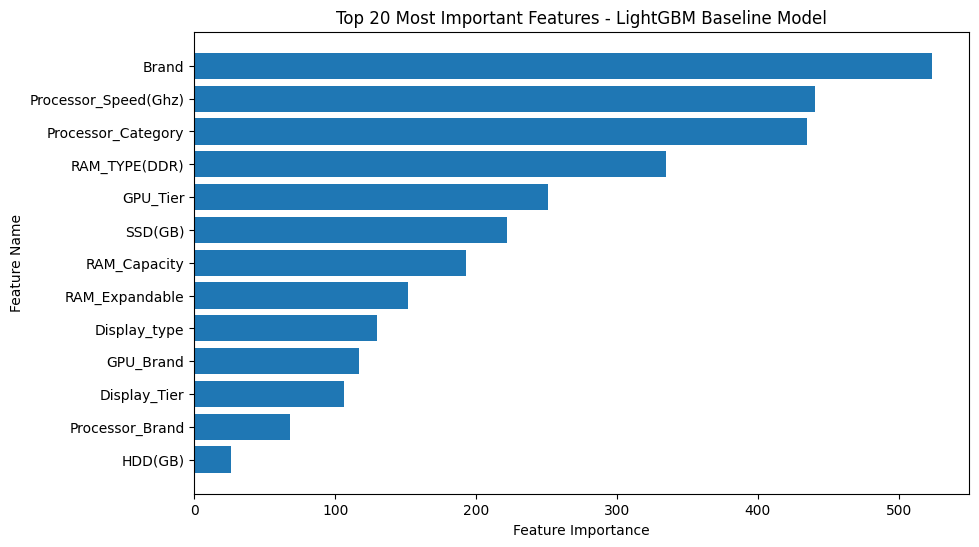

In [60]:
# Get feature importances and sort them
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': baseline_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top 20 Important Features:")
print(feature_importances.head(30))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:20][::-1], feature_importances['Importance'][:20][::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Most Important Features - LightGBM Baseline Model")
plt.show()